In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import warnings

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
np.random.seed(123)

indices = np.random.choice(len(mnist.data), 10000)
X = mnist.data.loc[indices] / 255.0 # Divide by 255 to normalize for RGB (red, green, blue) in image data
y = mnist.target.loc[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


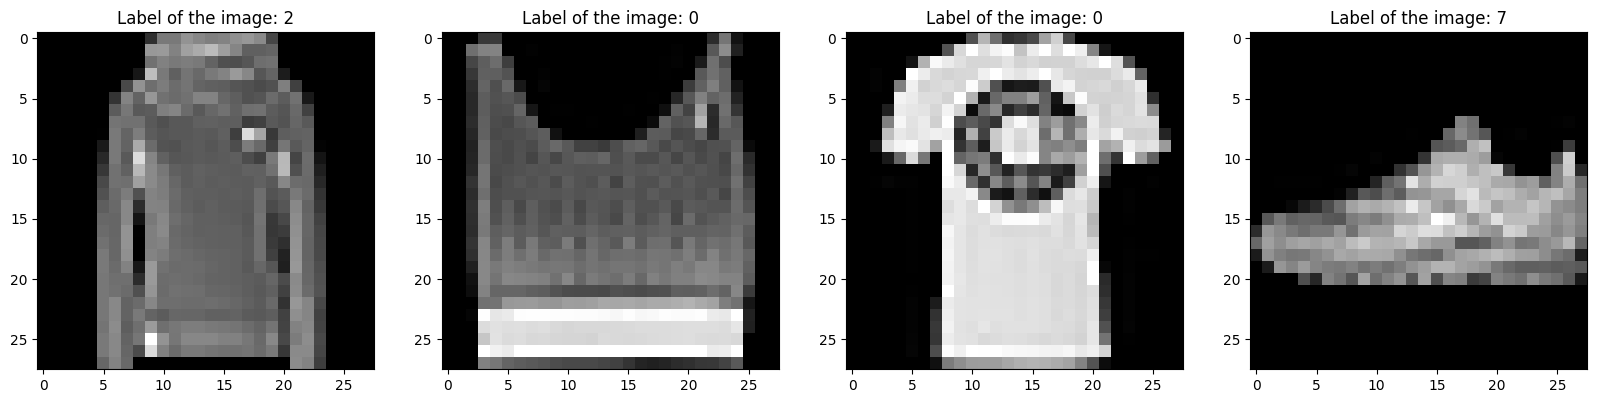

In [4]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X.iloc[123].values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[123]))

plt.subplot(142)
plt.imshow(X.iloc[124].values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[124]))

plt.subplot(143)
plt.imshow(X.iloc[125].values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[125]))

plt.subplot(144)
plt.imshow(X.iloc[126].values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[126]))

plt.show()

In [5]:
# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)

In [6]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y.iloc[i]),
             color=colours[int(y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
import time

from sklearn.manifold import TSNE

In [10]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.056s...
[t-SNE] Computed neighbors for 10000 samples in 8.325s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.836339
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.760025
[t-SNE] KL divergence after 300 iterations: 2.513517
t-SNE done! Time elapsed:

In [11]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y.iloc[i]),
             color=colours[int(y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 4.1.8 - #4: t-SNE is satisfactory? Easily Distingiushed? Which produced better results (t-SNE, or PCA from above)?

I would consider this to be almost satisfactory. It is much better than the previous attempt with PCA, but still has some regions that are difficult to comprehend.

In [12]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y.iloc[i]),
             color=colours[int(y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.